In [406]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
import pandas as pd
from sklearn.preprocessing import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras
import numpy 
dataset = read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results6_ClusteringSupervisedData\supervised_all1_1.xlsx')
#dataset = dataset.sample(frac=1, replace=False)
#dataset = dataset.reset_index(drop=True)




In [407]:
dataset 

,CQImoyen(t-7),TraficDataDL(t-7),TraficDataUL(t-7),VoIPqualitymeasinsuffstat(t-7),CROZON_NombredeConnexionsPS(t-7),nbUEVoIPqualityOK(t-7),Nbrtentatives_QCi5__TEAVoix(t-7),Tec(t-7),CQImoyen(t-6),TraficDataDL(t-6),...,Nbrtentatives_QCi5__TEAVoix(t+5),Tec(t+5),CQImoyen(t+6),TraficDataDL(t+6),TraficDataUL(t+6),VoIPqualitymeasinsuffstat(t+6),CROZON_NombredeConnexionsPS(t+6),nbUEVoIPqualityOK(t+6),Nbrtentatives_QCi5__TEAVoix(t+6),Tec(t+6)
0,0.034375,0.113021,0.022321,0.102083,0.166667,0.141477,0.009524,D,0.013542,0.063988,...,0.063988,D,0.028750,0.166667,0.010417,0.250000,0.025000,0.250000,0.045833,D
1,0.013542,0.063988,0.025000,0.063636,0.125000,0.210417,0.002083,D,0.145833,0.007917,...,0.045833,D,0.028750,0.002083,0.002083,0.075000,0.002083,0.016477,0.145833,D
2,0.145833,0.007917,0.208333,0.017500,0.125000,0.174242,0.187500,D,0.028750,0.166667,...,0.145833,D,0.028750,0.106250,0.009524,0.059375,0.166667,0.027083,0.145833,D
3,0.028750,0.166667,0.229167,0.044508,0.145833,0.250000,0.166667,D,0.013542,0.127083,...,0.145833,D,0.034375,0.166667,0.166667,0.036458,0.125000,0.057292,0.166667,D
4,0.013542,0.127083,0.068750,0.231250,0.002083,0.375000,0.010417,D,0.083333,0.166667,...,0.166667,D,0.010417,0.020313,0.007576,0.033333,0.125000,0.033333,0.187500,D
5,0.083333,0.166667,0.250000,0.141369,0.028750,0.246324,0.010417,D,0.025000,0.229167,...,0.187500,D,0.011667,0.208333,0.020313,0.041667,0.025000,0.141369,0.009524,D
6,0.025000,0.229167,0.208333,0.098485,0.229167,0.236012,0.145833,D,0.009524,0.229167,...,0.009524,D,0.125000,0.092857,0.127083,0.312500,0.002083,0.283333,0.063988,D
7,0.009524,0.229167,0.187500,0.075000,0.085417,0.015625,0.040476,D,0.104167,0.082812,...,0.063988,D,0.013542,0.229167,0.147917,0.080208,0.166667,0.097436,0.187500,D
8,0.104167,0.082812,0.102083,0.024405,0.025000,0.395833,0.057292,D,0.002083,0.057292,...,0.187500,D,0.002083,0.008333,0.208333,0.033333,0.166667,0.044508,0.166667,D
9,0.002083,0.057292,0.187500,0.030833,0.145833,0.194792,0.009524,D,0.011667,0.229167,...,0.166667,D,0.034375,0.291667,0.082812,0.075000,0.145833,0.055769,0.187500,D


1
2
3
4
5
6
7
8
9
10
11
12
13
14
(800, 1, 56) (800,) (112, 1, 56) (112,)
Train on 800 samples, validate on 112 samples
Epoch 1/70
 - 12s - loss: 0.1018 - val_loss: 0.0469
Epoch 2/70
 - 0s - loss: 0.0798 - val_loss: 0.0286
Epoch 3/70
 - 0s - loss: 0.0672 - val_loss: 0.0318
Epoch 4/70
 - 0s - loss: 0.0620 - val_loss: 0.0292
Epoch 5/70
 - 0s - loss: 0.0601 - val_loss: 0.0279
Epoch 6/70
 - 0s - loss: 0.0589 - val_loss: 0.0277
Epoch 7/70
 - 0s - loss: 0.0567 - val_loss: 0.0274
Epoch 8/70
 - 0s - loss: 0.0536 - val_loss: 0.0271
Epoch 9/70
 - 0s - loss: 0.0499 - val_loss: 0.0274
Epoch 10/70
 - 0s - loss: 0.0458 - val_loss: 0.0286
Epoch 11/70
 - 0s - loss: 0.0424 - val_loss: 0.0303
Epoch 12/70
 - 0s - loss: 0.0409 - val_loss: 0.0312
Epoch 13/70
 - 0s - loss: 0.0404 - val_loss: 0.0307
Epoch 14/70
 - 0s - loss: 0.0401 - val_loss: 0.0303
Epoch 15/70
 - 0s - loss: 0.0399 - val_loss: 0.0303
Epoch 16/70
 - 0s - loss: 0.0397 - val_loss: 0.0305
Epoch 17/70
 - 0s - loss: 0.0395 - val_loss: 0.0308
Epoch

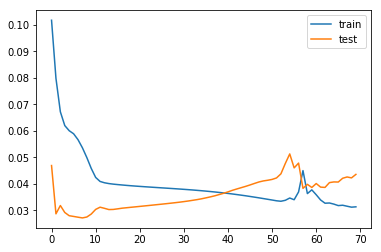

Test RMSE: 0.209


In [409]:
values = dataset.values
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


n_days_pred = 7
n_days = 7
n_features = 8
n_obs = n_days*n_features
n_train_samples = 800

# integer encode direction
encoder = LabelEncoder()
encoder.fit(values[:,7])
for i in range(1,n_days+n_days_pred+1):
    print(i)
    values[:,8*i-1] = encoder.transform(values[:,8*i-1])
values = values.astype('float32')

#Scale Data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

train = values[:n_train_samples, :]
test = values[n_train_samples:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, n_obs]
test_X, test_y = test[:, :n_obs], test[:, n_obs]
 
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(60, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(10))  # return a single vector of dimension 32
model.add(Dense(1,activation='relu'))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=70, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

scaler = MinMaxScaler(feature_range=(0, 1))
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
#yhat= scaler.fit_transform(yhat)
#test_y= scaler.fit_transform(test_y)

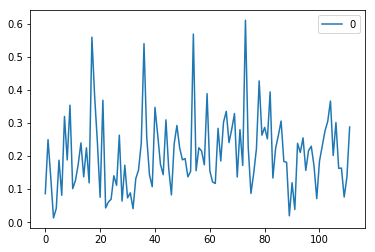

In [410]:
DataFrame(yhat).plot()

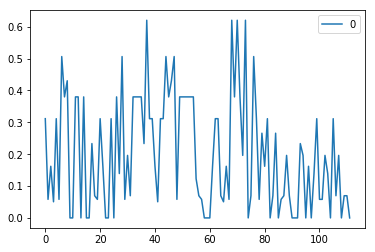

In [411]:
DataFrame(test_y).plot()

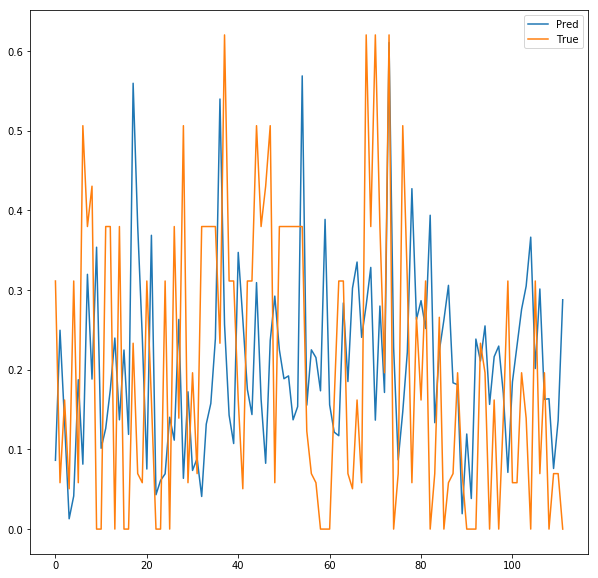

In [412]:
res = DataFrame()
res['Pred'] = DataFrame(yhat)[0]
res['True'] = DataFrame(test_y)[0]
res.plot(figsize = (10,10))

In [413]:
mask1 = [DataFrame(yhat)[0]>0.5]
numpy.sum(mask1)

4

In [414]:
mask2 = [DataFrame(inv_y)[0]>0.5]
numpy.sum(mask2)

9

In [415]:
a = [mask1[i] == mask2[i] for i in range(0,len(mask1))]
numpy.sum(a)/len(test)

0.9017857142857143

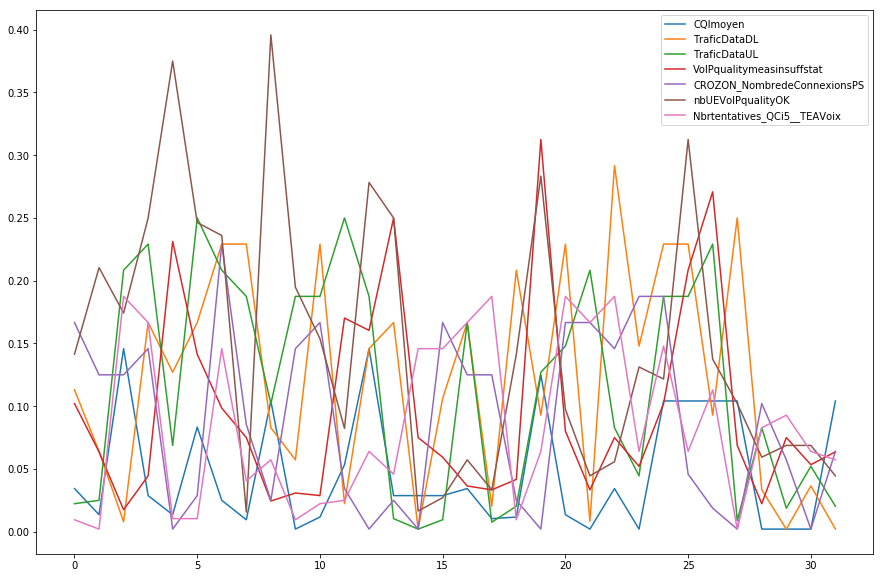

In [416]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\results5_ClusteringTimeSeries\clustering_ts_Gare_St_lazare_D10562A.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

In [417]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(name+'(t-%d)' % (i)) for name in data.columns]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [name+'(t)' for name in data.columns]
		else:
			names += [(name+'(t+%d)' % (i)) for name in data.columns]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [419]:
example_values = series_to_supervised(cellKpi, n_in=7, n_out=7, dropnan=True).values
# integer encode direction
encoder = LabelEncoder()
encoder.fit(example_values[:,7])
for i in range(1,n_days+n_days_pred+1):
    print(i)
    example_values[:,8*i-1] = encoder.transform(example_values[:,8*i-1])
values = values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
example_values = scaler.fit_transform(example_values)

1
2
3
4
5
6
7
8
9
10
11
12
13
14


C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [420]:
example_values_X = example_values[:, :n_obs]
example_values_y = example_values[:, n_obs+(n_days_pred-1)*n_features]

In [421]:
example_values_X = example_values_X.reshape((example_values_X.shape[0], 1, example_values_X.shape[1]))

In [422]:
yhat = model.predict(example_values_X)
#yhat =scaler.fit_transform(yhat)

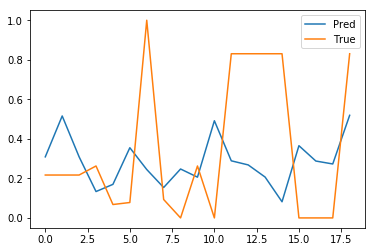

In [423]:
ex = DataFrame()
ex['Pred'] = DataFrame(yhat)[0]
ex['True'] = example_values_y
ex.plot()